# 다변량 데이터 탐색 실습
## 1. 상관관계 분석
    - cov() : 결측값을 제외한 쌍별 공분산을 구하는 메서드
    - DataFrame.cov(min_periods=None, ddof=1)
    - corr() : 각 열 간의 상관 계수를 반환하는 메서드
    - DataFrame.corr(method='pearson', min_periods=1)

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 
import matplotlib.pyplot as plt
import seaborn as sns

# os에 따른 Font 깨짐 제거를 위해 Font 지정
import os
if os.name == 'nt' : 
    font_family = 'Malgun Gothic'
else : 
    font_family = 'AppleGothic'
    
# - 값이 깨지는 문제 해결을 위해 파라미터값 설정
sns.set(font=font_family, rc = {'axes.unicode_minus' : False})

In [4]:
## 데이터셋 준비
# iris 붓꽃 데이터 로드
from sklearn.datasets import load_iris

iris = load_iris()
# print(iris.DESCR) # 붓꽃 데이터 상세 정보
# 붓꽃 데이터 특성 확인

columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# 데이터 생성 및 준비
data = pd.DataFrame(iris.data, columns=columns)
sy = pd.Series(iris.target, dtype='category')
sy = sy.cat.rename_categories(iris.target_names)
data['species'] = sy

# 필터명 정의
cols = iris.feature_names

data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
# 공분산 산출
# 공분산은 수치적인 의미보다 패턴 확인에 중점
df_cov = data.cov()
df_cov

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.685694,-0.042434,1.274315,0.516271
sepal_width,-0.042434,0.189979,-0.329656,-0.121639
petal_length,1.274315,-0.329656,3.116278,1.295609
petal_width,0.516271,-0.121639,1.295609,0.581006


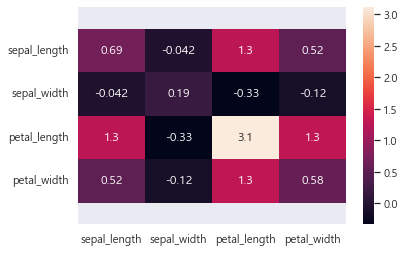

In [6]:
# 공분산 히트맵 작성
# 공분산은 선형적인 관계를 측정하기 떄문에
# 두 변수가 비선형적으로 함께 변하는 경우는 잘 측정하지 못함
ax = sns.heatmap(df_cov, annot=True)
ylim = ax.get_ylim() # y축 범위
ax.set_ylim(ylim[0] + 0.5, ylim[1] - 0.5)
plt.show()

In [7]:
# 상관계수 계산

correlation_matrix = data.corr()
correlation_matrix

# 절대값이 0.3 이상이면 상관관계가 있다.

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


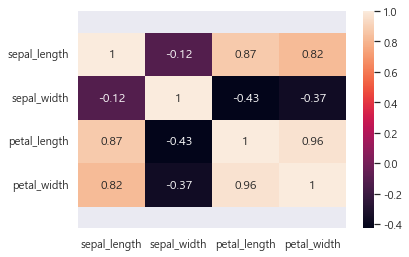

In [8]:
#상관계수  히트맵
ax = sns.heatmap(correlation_matrix, annot=True)
ylim = ax.get_ylim() # y축 범위
ax.set_ylim(ylim[0] + 0.5, ylim[1] - 0.5)
plt.show()

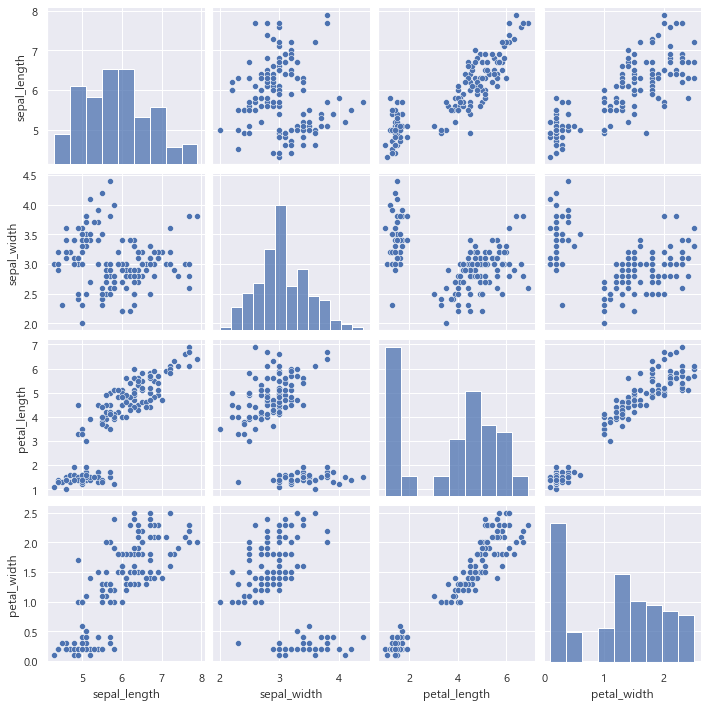

In [9]:
# 산점도 행렬(다변량 데이터 시각화)
sns.pairplot(data, diag_kind='hist')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


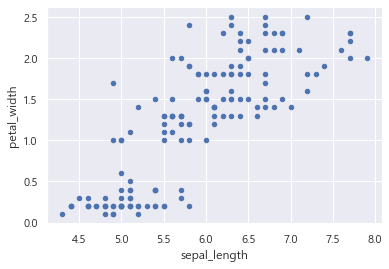

In [10]:
# 산점도 (Scatter plot)
data.plot(kind = 'scatter', x= 'sepal_length', y = 'petal_width')
plt.show()

In [12]:
# 상관계수 유의성 검정
# 귀무가설 : sepal_length와 petal_width는 상관관계가 없다.
# 대립가설 : sepal_length와 petal_width는 상관관계가 있다.
import scipy.stats as sp

corr_values, pval = sp.pearsonr(data['sepal_length'], data['petal_width'])

print('상관계수 :', corr_values)
print('p_value :', format(pval, '0.55f'))

# p_value  값은 유의수준 0.05보다 작으며, 따라서 기각역에 포함되어 상관관계가 있다.

상관계수 : 0.8179411262715757
p_value : 0.0000000000000000000000000000000000002325498079793166956


## 2. 교차표 분석 -2개 이상의 범주형 변수분석
    - crosstab() : 교차표 생성 함수
    - scipy 모듈의 chi2_contingency() : 2개의 범주형 변수에 대한 카이제곱 통계량 계산

In [13]:
#교차분석 하기 위한 범주형 데이터 정의
cross_data = pd.DataFrame(
                {"영양제":['복용','복용','복용','복용','복용','복용','복용','복용',
                           '복용','복용','복용','복용','복용','복용','복용','복용',
                           '복용','복용','복용','복용',
                           '미복용','미복용','미복용','미복용','미복용','미복용',
                           '미복용','미복용','미복용','미복용','미복용','미복용',
                           '미복용','미복용','미복용','미복용','미복용','미복용',
                           '미복용','미복용'], 
                 
                 "감기여부":['유','유','유','유','유','무','무','무','무','무',
                             '무','무','무','무','무','무','무','무','무','무',
                             '유','유','유','유','유','유','유','유','유','유',
                             '유','유','무','무','무','무','무','무','무','무']
                }
)

cross_data.head(5)

,영양제,감기여부
0,복용,유
1,복용,유
2,복용,유
3,복용,유
4,복용,유


In [16]:
# 교차분석표 생성
# summary 행렬 포함한 교차표
print(pd.crosstab(cross_data['영양제'], cross_data['감기여부'], margins=True))

# 계산하기 위한 교차표
data_crosstab = pd.crosstab(cross_data['영양제'], cross_data['감기여부'], margins=False)

감기여부   무   유  All
영양제              
미복용    8  12   20
복용    15   5   20
All   23  17   40


In [17]:
data_crosstab

감기여부,무,유
영양제,,
미복용,8,12
복용,15,5


In [18]:
# 교차표 분석 : 카이제곱 통계량 산출
from scipy.stats import chi2_contingency

# correction-True를 적용하면 Yaters' correction이 적용되어
# 검정통계량이 보수적으로 더 낮게 나옴

result = chi2_contingency(observed=data_crosstab, correction=False)
print("1. 카이제곱 통계량 :", result[0])
print("2. p-value :", result[1])
print("3. df :", result[2]) # (행의 개수-1) * (열의 개수-1)
print("4. 기대값 행렬 :")
pd.DataFrame(result[3]).rename(index={0 : '복용', 1 : '미복용'}, columns={0 : '유', 1:'무'})

1. 카이제곱 통계량 : 5.012787723785166
2. p-value : 0.025160759200408785
3. df : 1
4. 기대값 행렬 :


,유,무
복용,11.5,8.5
미복용,11.5,8.5
